### <h1> Task 4 <h1> (Поиск максимума из минимумов в строках квадратной матрицы)

In [31]:
from IPython.display import display
import pandas as pd
from myplots import time_iter_plot, time_thread_plot, speedup_plot

In [32]:
data_1 = pd.read_csv('data/matrix_1.csv')
data_2 = pd.read_csv('data/matrix_2.csv')
display(data_1)
display(data_2)

,Num_Threads,Iter,Time
0,1,10,4506
1,2,10,334
2,3,10,211
3,4,10,211
4,5,10,200
...,...,...,...
59,12,10000,167321
60,13,10000,187702
61,14,10000,208698
62,15,10000,185066


,Num_Threads,Iter,Time
0,1,10,181
1,2,10,136
2,3,10,92
3,4,10,92
4,5,10,84
...,...,...,...
59,12,10000,178984
60,13,10000,196675
61,14,10000,202444
62,15,10000,204457


In [33]:
labels = ['OneFor', 'TwoFor']

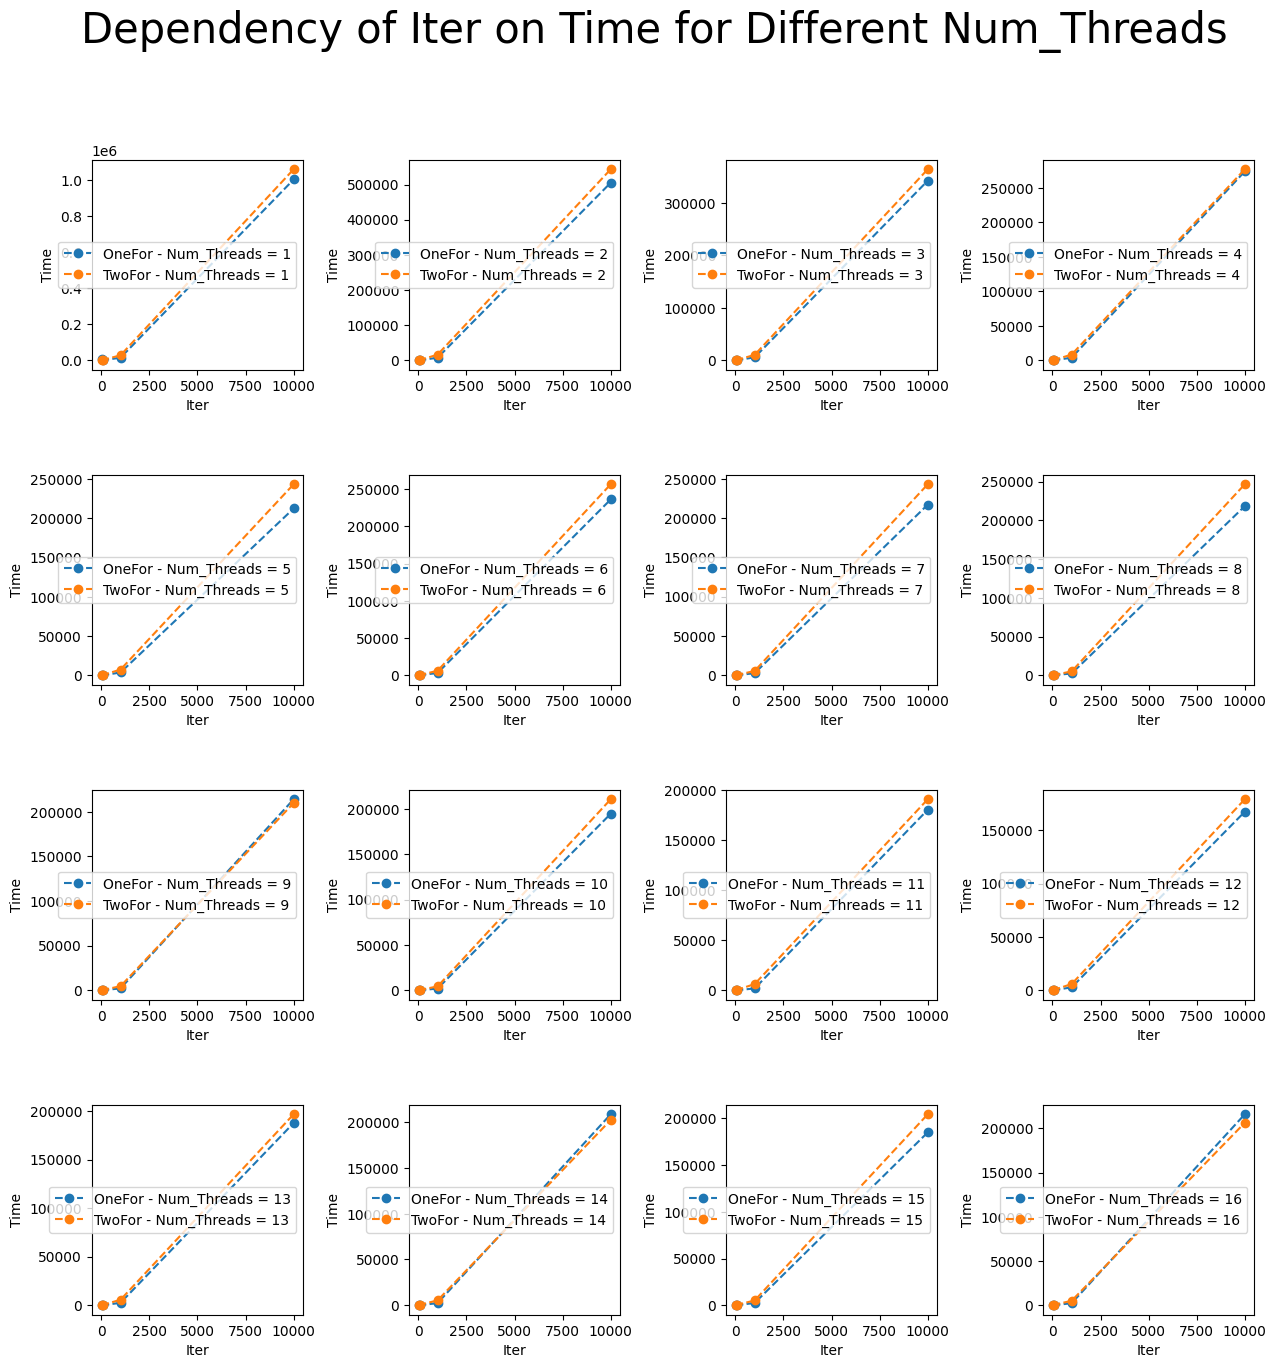

In [34]:
thread_groups_1 = data_1.groupby('Num_Threads')
thread_groups_2 = data_2.groupby('Num_Threads')

thread_groups = [thread_groups_1, thread_groups_2]
time_iter_plot(thread_groups, labels)

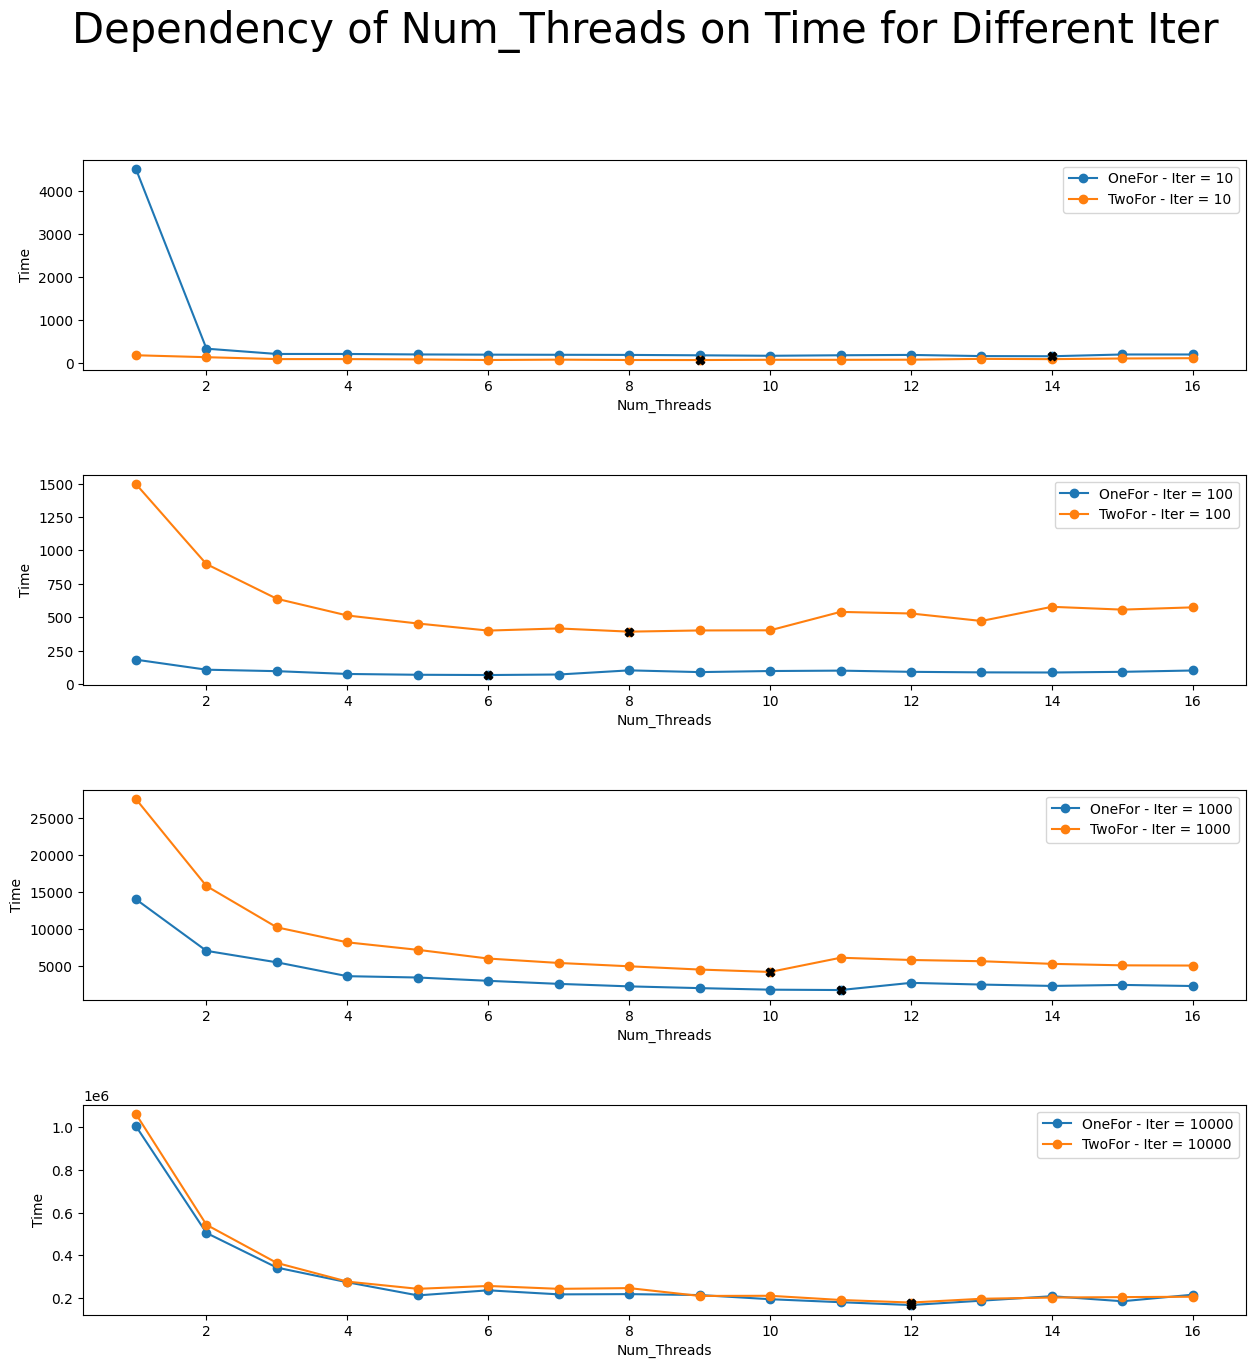

In [35]:
iter_groups_1 = data_1.groupby('Iter', as_index=False)
iter_groups_2 = data_2.groupby('Iter', as_index=False)

iter_groups = [iter_groups_1, iter_groups_2]
time_thread_plot(iter_groups, labels)

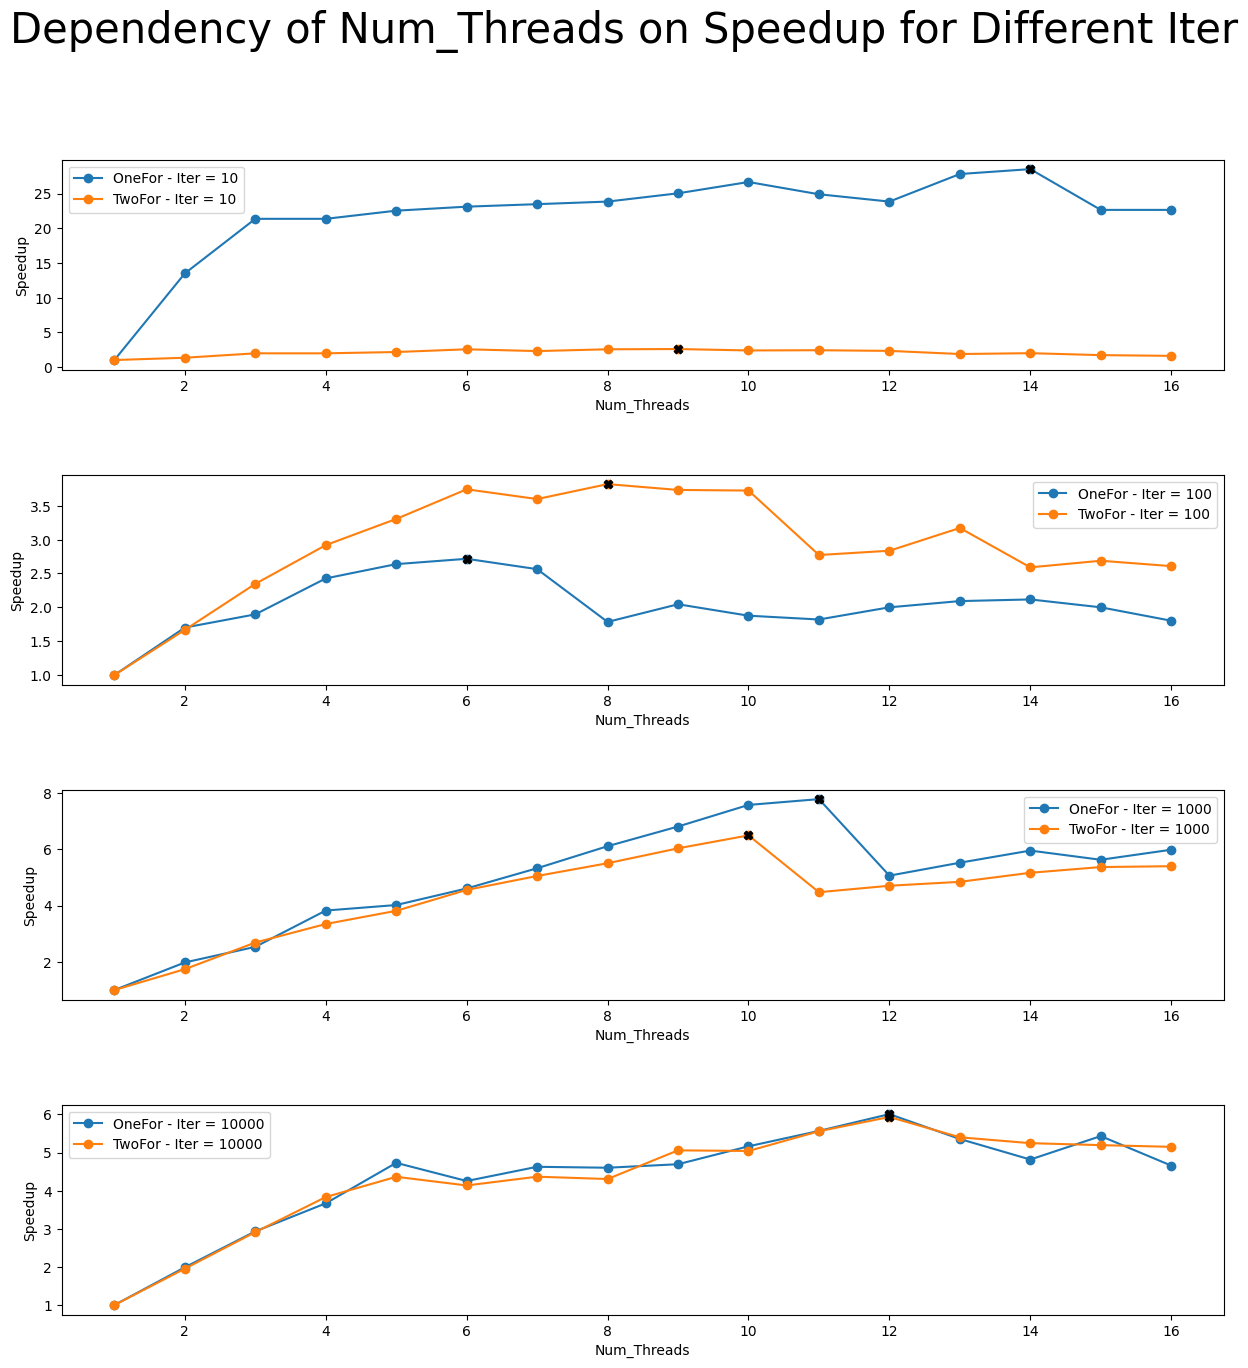

In [36]:
speedup_plot(iter_groups, labels)

# Вывод:
Не удалось исследовать прирост от двойного уровня вложенности параллелизма по сравнению с одинарным, так как мой компилятор не поддерживает NESTED.
***
##### P.s. Это справедливо, если мы оцениваем результаты в целом (для разного кол-ва потоков и итераций) с перспективой масштабирования задачи. 